In [5]:
%reload_ext autoreload
import sys
sys.path.append("../utils/")

# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules

from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice
import numpy as np

import functools
import time

from utils import DeviceUtils,DeviceScanner,BraketTaskScanner,Plotter
from hadamard_bench import *

import json
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

#############################
Device name:  Aspen-M-2
Device type:  AwsDeviceType.QPU
Device arn:  arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2
Device provider: Rigetti
Device status: ONLINE
Device availability:  False
Device region:  us-west-1
Supported gates:  ['cz', 'xy', 'ccnot', 'cnot', 'cphaseshift', 'cphaseshift00', 'cphaseshift01', 'cphaseshift10', 'cswap', 'h', 'i', 'iswap', 'phaseshift', 'pswap', 'rx', 'ry', 'rz', 's', 'si', 'swap', 't', 'ti', 'x', 'y', 'z', 'start_verbatim_box', 'end_verbatim_box']


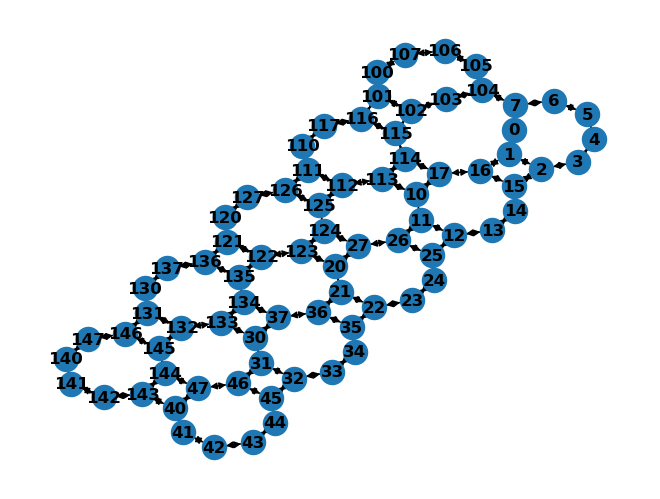

In [3]:
rigetti = DeviceUtils.get_device('rigetti')
ion_q = DeviceUtils.get_device('ionq')
# rigetti = LocalSimulator()
#ion_q = LocalSimulator()

ds = DeviceScanner( device = rigetti)

ds.list_properties()

In [3]:
shots = 1000
#set_n_qubits = range(3,10)
n_qubits = 11
set_line_length = [10,20,30,50,100]
print(set_line_length)

[10, 20, 30, 50, 100]


1000 shots 11 qubits tasks Rigetti


In [12]:
rigetti_tasks = []
labels = []

for line_length in set_line_length:
    print(line_length)
    
    circ = Circuit().H_line(n_qubits,line_length,'Rigetti')
    circ = Circuit().add_verbatim_box(circ)
   
    rigetti_task = rigetti.run(circ,shots=shots)
    rigetti_tasks.append(rigetti_task)
    labels.append( "rigetti_s1000_q11_hl" + str(line_length))

10
20
30
50
100


In [15]:
dump_tasks(rigetti_tasks, labels, filename = "H_line_rigetti_grosso")

In [6]:
tasks = load_tasks("H_line_rigetti_grosso")
scanners = [BraketTaskScanner(qtask = task) for key, task in tasks.items()]

status = [task.get_status() for task in scanners]
print(status)

['COMPLETED', 'COMPLETED', 'COMPLETED', 'COMPLETED', 'COMPLETED']


1000 shots 11 qubits tasks IonQ

In [10]:
ionq_tasks = []
labels = []

for line_length in set_line_length:
    print(line_length)
    
    circ = Circuit().H_line(n_qubits,line_length,'IonQ')
    circ = Circuit().add_verbatim_box(circ)
   
    ionq_task = ion_q.run(circ,shots=shots)
    ionq_tasks.append(ionq_task)
    labels.append( "ionq_s1000_q11_hl" + str(line_length))

10
20
30
50
100


In [ ]:
dump_tasks(ionq_tasks, labels, filename = "H_line_ionq_grosso")

In [14]:
tasks = load_tasks("H_line_ionq_grosso")
scanners = [BraketTaskScanner(qtask = task) for key, task in tasks.items()]

status = [task.get_status() for task in scanners]
print(status)

['QUEUED', 'QUEUED', 'QUEUED', 'QUEUED', 'QUEUED']


## Analisi Risultati


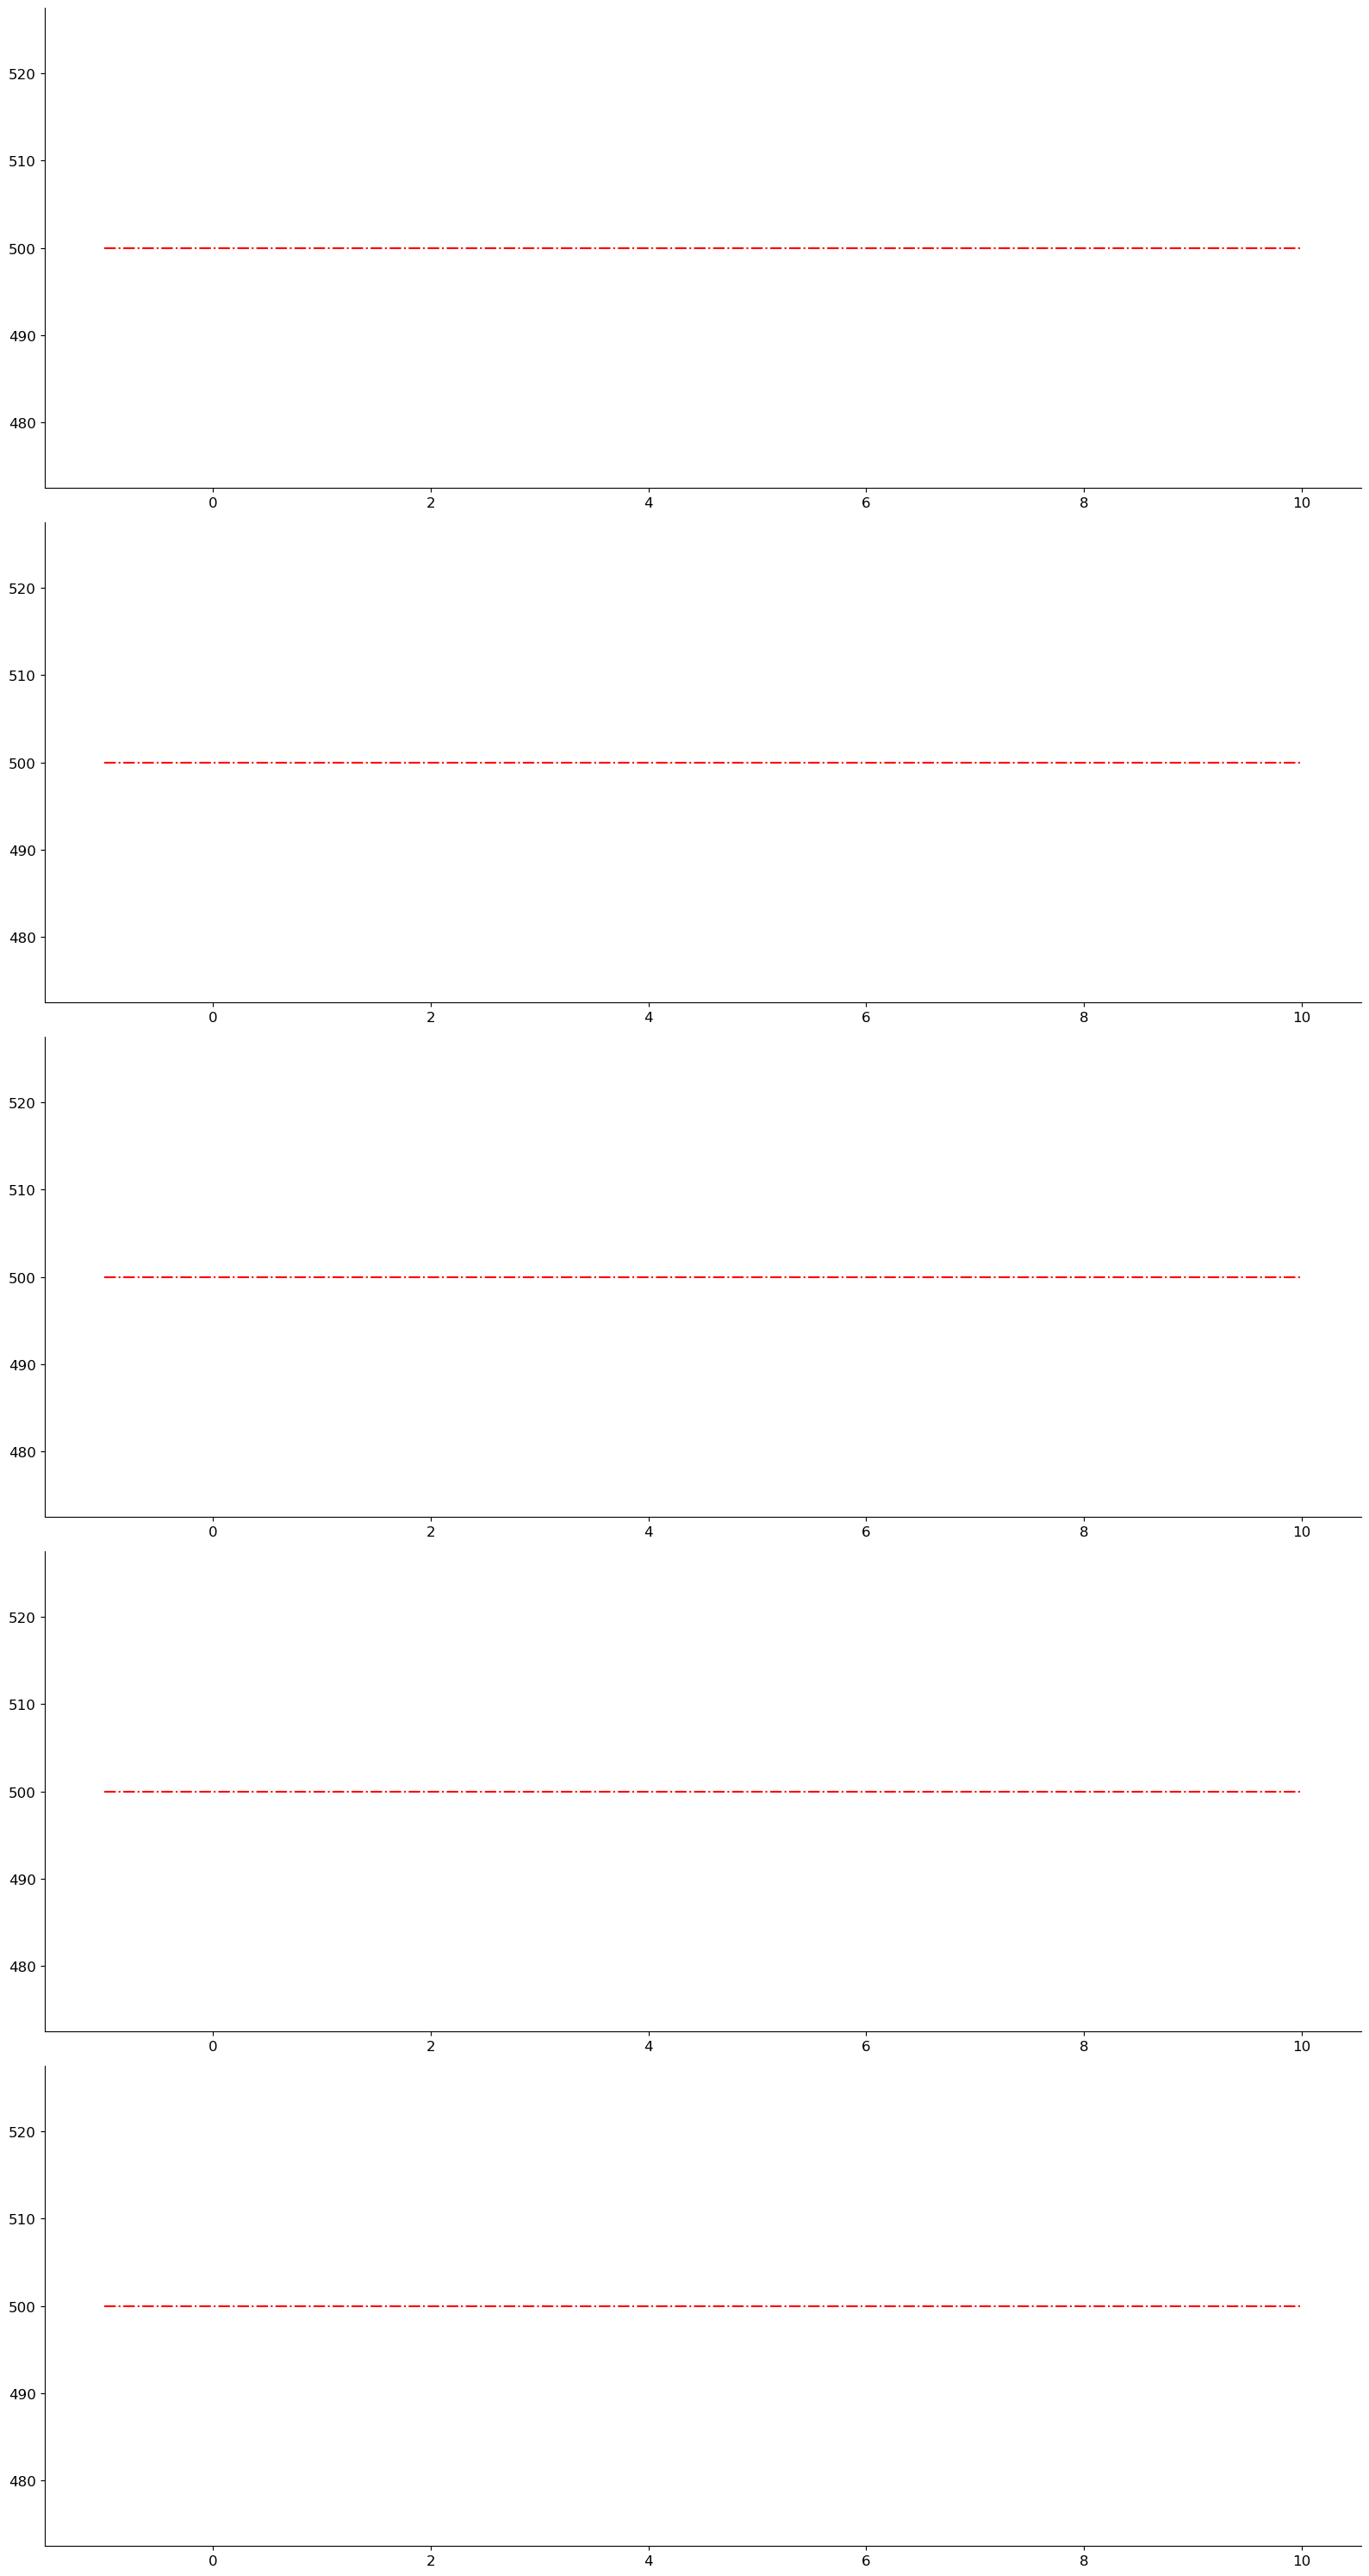

In [10]:
n_tasks = len(scanners)

fig, axx = plt.subplots(n_tasks, 1, figsize=(16, 30),tight_layout=True,)
axx = axx.reshape(-1)
i=0
for ax, key in zip(axx,tasks):

    H_len = key.split("_")[-1][1:]

    df = result_per_qubit( tasks[key].result(), H_len= H_len)
    plot_result_per_qubit(data = df, ax = ax)

    ax.hlines(shots /2 ,-1,10,linestyles='-.',color='red')